#Importing Necessary Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Data Loading and Exploration

In [20]:
file_path = '/content/AirQualityUCI.xlsx'
data = pd.read_excel(file_path)

In [21]:
# Display the first few rows of the dataset
print("Head of the dataset:")
print(data.head())

Head of the dataset:
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  

In [22]:
# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: dat

In [23]:
# Summary statistics of numerical features
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.

In [24]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

<Figure size 1200x800 with 0 Axes>

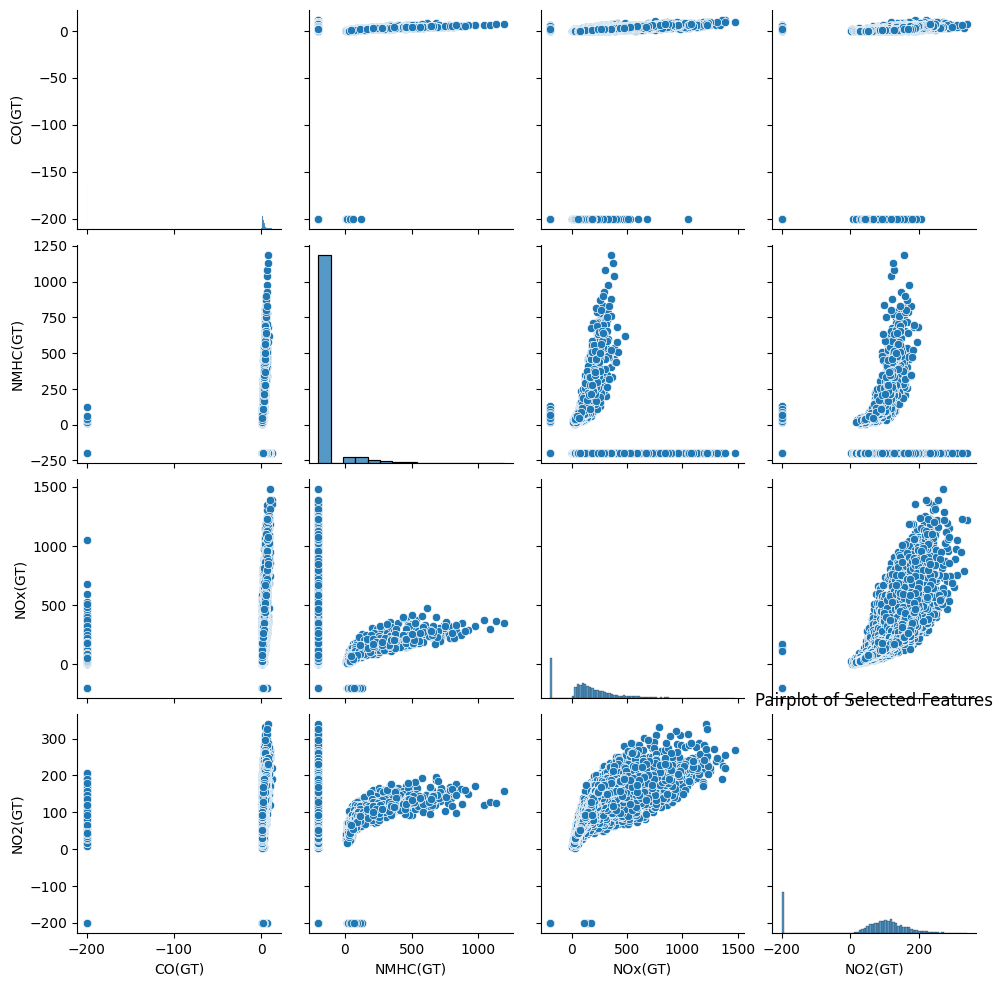

In [25]:
# Visualize the distribution of features
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'], palette='viridis')
plt.title('Pairplot of Selected Features')
plt.show()

#Data Preprocessing

In [26]:
# Handling missing values
data.replace(-200, np.nan, inplace=True)
data.dropna(inplace=True)

In [27]:
# Selected Features
selected_features = ['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']

# Convert 'Time' to string and then to datetime
data['Time'] = pd.to_datetime(data['Time'].astype(str))

# Define selected features
selected_features = ['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']

# Handling outliers
for feature in selected_features:
    median_value = data[feature].median()
    data[feature] = np.where((data[feature] < data[feature].quantile(0.01)) | (data[feature] > data[feature].quantile(0.99)),
                             median_value, data[feature])

# Instantiate StandardScaler
scaler = StandardScaler()

# Reapply standardization
X_scaled = scaler.fit_transform(data[selected_features])

# Display updated information
print("Updated Dataset Info:")
print(data.info())



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           827 non-null    datetime64[ns]
 1   Time           827 non-null    datetime64[ns]
 2   CO(GT)         827 non-null    float64       
 3   PT08.S1(CO)    827 non-null    float64       
 4   NMHC(GT)       827 non-null    float64       
 5   C6H6(GT)       827 non-null    float64       
 6   PT08.S2(NMHC)  827 non-null    float64       
 7   NOx(GT)        827 non-null    float64       
 8   PT08.S3(NOx)   827 non-null    float64       
 9   NO2(GT)        827 non-null    float64       
 10  PT08.S4(NO2)   827 non-null    float64       
 11  PT08.S5(O3)    827 non-null    float64       
 12  T              827 non-null    float64       
 13  RH             827 non-null    float64       
 14  AH             827 non-null    float64       
dtype

#Clustering Algorithms

In [36]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Labels'] = kmeans.fit_predict(X_scaled)

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['Hierarchical_Labels'] = agg_clustering.fit_predict(X_scaled)

# K-Means Shift clustering
kmeans_shift = MeanShift()
data['KMeansShift_Labels'] = kmeans_shift.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Evaluation Metrics

In [35]:
def evaluate_clustering_performance(labels, data):
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return silhouette, calinski_harabasz, davies_bouldin

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Perform Hierarchical (Agglomerative) clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Perform K-Means Shift clustering
kmeans_shift = MeanShift()
kmeans_shift_labels = kmeans_shift.fit_predict(X_scaled)

# Clustering performance
kmeans_performance = evaluate_clustering_performance(kmeans_labels, X_scaled)
hierarchical_performance = evaluate_clustering_performance(hierarchical_labels, X_scaled)
kmeans_shift_performance = evaluate_clustering_performance(kmeans_shift_labels, X_scaled)

# Print
print("K-Means Performance:")
print(f"Silhouette Score: {kmeans_performance[0]}")
print(f"Calinski-Harabasz Index: {kmeans_performance[1]}")
print(f"Davies-Bouldin Index: {kmeans_performance[2]}")

print("\nHierarchical Performance:")
print(f"Silhouette Score: {hierarchical_performance[0]}")
print(f"Calinski-Harabasz Index: {hierarchical_performance[1]}")
print(f"Davies-Bouldin Index: {hierarchical_performance[2]}")

print("\nK-Means Shift Performance:")
print(f"Silhouette Score: {kmeans_shift_performance[0]}")
print(f"Calinski-Harabasz Index: {kmeans_shift_performance[1]}")
print(f"Davies-Bouldin Index: {kmeans_shift_performance[2]}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Performance:
Silhouette Score: 0.4354132621011238
Calinski-Harabasz Index: 1187.322446979819
Davies-Bouldin Index: 0.8253660254166478

Hierarchical Performance:
Silhouette Score: 0.4361569338190538
Calinski-Harabasz Index: 1085.133051321248
Davies-Bouldin Index: 0.8794322264460926

K-Means Shift Performance:
Silhouette Score: 0.38016033609578864
Calinski-Harabasz Index: 333.3135700307753
Davies-Bouldin Index: 1.5455038917446866


#Visualizations

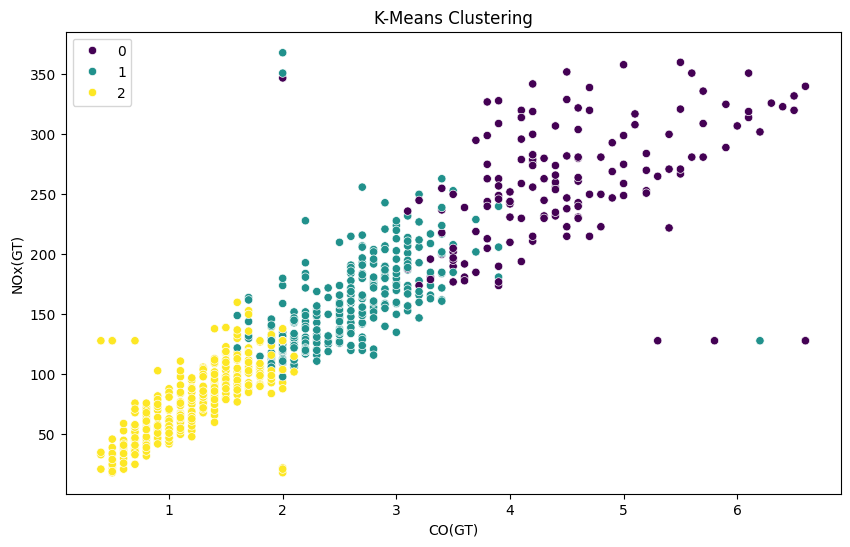

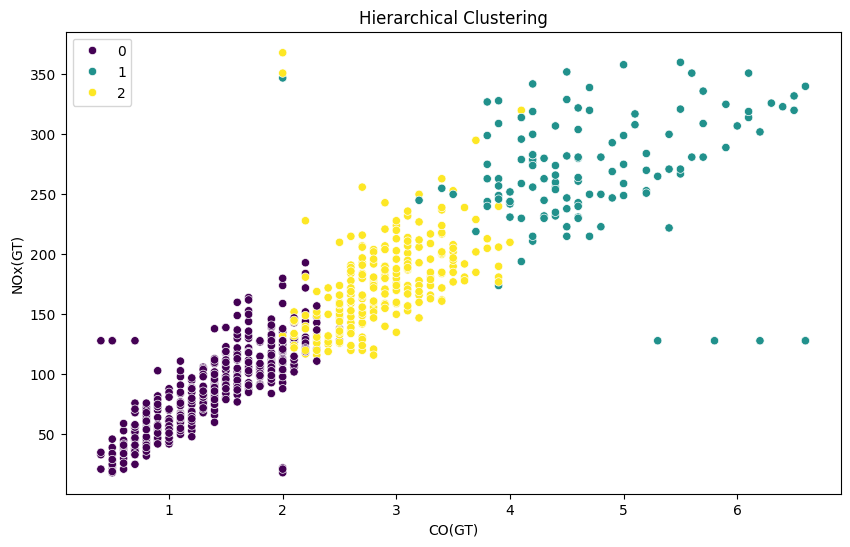

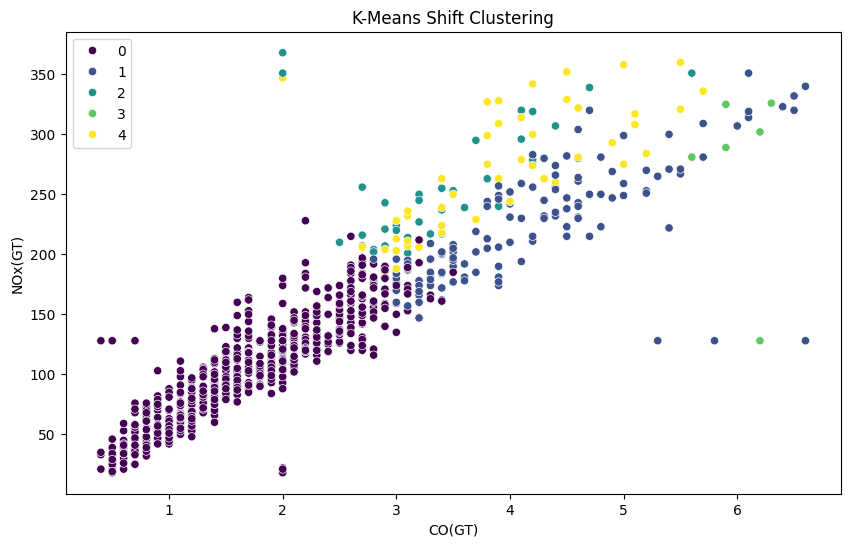

In [38]:
def visualize_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='CO(GT)', y='NOx(GT)', hue=labels, data=data, palette='viridis', legend='full')
    plt.title(title)
    plt.show()

# Visualize K-Means Clustering
visualize_clusters(data, kmeans_labels, 'K-Means Clustering')

# Visualize Hierarchical Clustering
visualize_clusters(data, hierarchical_labels, 'Hierarchical Clustering')

# Visualize K-Means Shift Clustering
visualize_clusters(data, kmeans_shift_labels, 'K-Means Shift Clustering')
